1a. Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.

In [1]:
import sklearn
from sklearn.datasets import make_moons

# Make 1000 samples 
n_samples = 1000
# Create moons
X,y = make_moons(n_samples,
                 noise = .03,
                 random_state = 42)

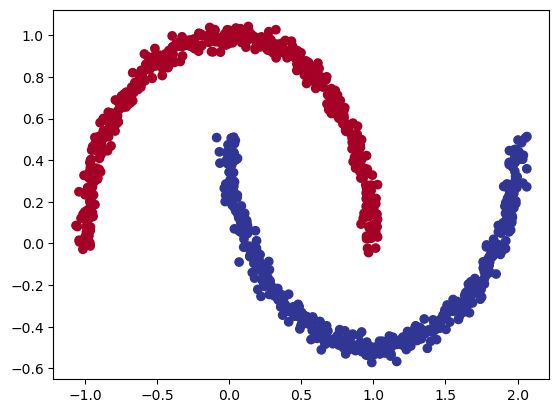

In [2]:
# Visualize the data on a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

1b. Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [3]:
import torch
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [4]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [5]:
import torch
from torch import nn

In [6]:
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2,  out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu    = nn.ReLU()
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))
    
model_0 = MoonModelV0()
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [7]:
loss_fn   = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.1)

4 . Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.

Train the model for long enough for it to reach over 96% accuracy.

The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [8]:
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task = "multiclass", num_classes=2)

In [9]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Loop through data 
epochs = 1000
for epoch in range(epochs):
    # Training
    model_0.train()
    
    # Forward Pass
    y_logits = model_0(X_train).squeeze()
    y_pred   = torch.round(torch.sigmoid(y_logits))
    
    # Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc  = accuracy_fn(y_pred, y_train.int())
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss Backward
    loss.backward()
    
    # Step the optimizer
    optimizer.step()
    
    ## Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred   = torch.round(torch.sigmoid(test_logits))
        
        test_loss   = loss_fn(test_logits, y_test)
        test_acc    = accuracy_fn(test_pred, y_test.int())
        
        # Print out what's happeinin
        if epoch % 100 == 0 :
            print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss:{test_loss:.4f}, Test Acc:{test_acc:.2f}")

Epoch: 0 | Loss: 0.7022, Acc: 0.29% | Test loss:0.6996, Test Acc:0.26
Epoch: 100 | Loss: 0.2976, Acc: 0.85% | Test loss:0.3121, Test Acc:0.85
Epoch: 200 | Loss: 0.2440, Acc: 0.88% | Test loss:0.2457, Test Acc:0.89
Epoch: 300 | Loss: 0.2401, Acc: 0.89% | Test loss:0.2387, Test Acc:0.89
Epoch: 400 | Loss: 0.2397, Acc: 0.89% | Test loss:0.2376, Test Acc:0.89
Epoch: 500 | Loss: 0.2395, Acc: 0.89% | Test loss:0.2373, Test Acc:0.89
Epoch: 600 | Loss: 0.2395, Acc: 0.89% | Test loss:0.2372, Test Acc:0.89
Epoch: 700 | Loss: 0.2395, Acc: 0.89% | Test loss:0.2371, Test Acc:0.89
Epoch: 800 | Loss: 0.2394, Acc: 0.89% | Test loss:0.2371, Test Acc:0.89
Epoch: 900 | Loss: 0.2394, Acc: 0.89% | Test loss:0.2371, Test Acc:0.89


5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [10]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 1., 1., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [11]:
from helper_functions import plot_predictions, plot_decision_boundary

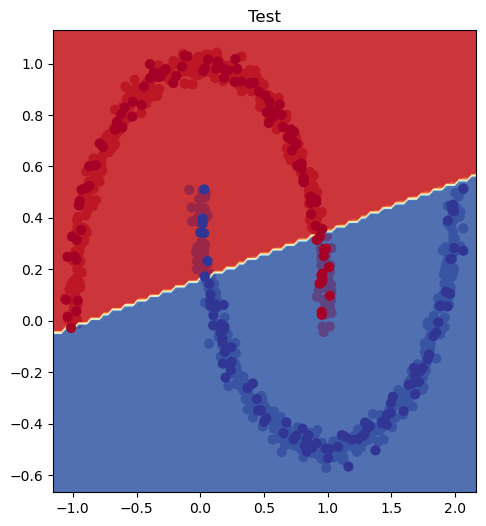

In [12]:
# Plot decsion boundaries
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.


In [13]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [14]:
import numpy as np

def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

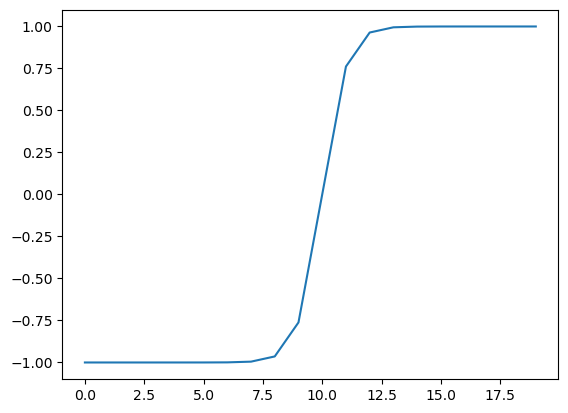

In [15]:
plt.plot(tanh(A))

7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).

Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).

Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.


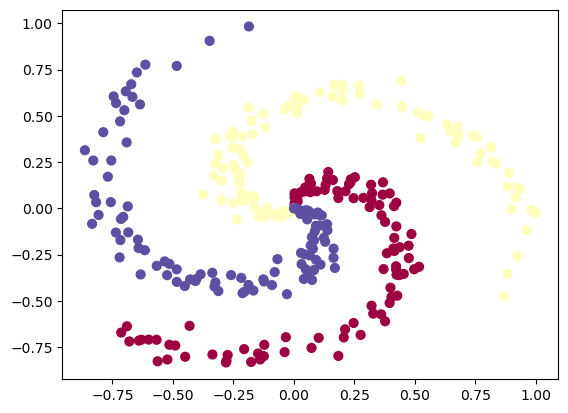

In [16]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels


for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j


# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [17]:
RANDOM_SEED = 42
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)


(240, 60, 240, 60)

In [18]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3)
acc_fn


MulticlassAccuracy()

In [28]:
class SpiralModelV1(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,   out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,   out_features = output_features)
        )
        
    
        
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model_1 = SpiralModelV1(input_features = 2,
                        output_features= 3,
                        hidden_units   = 8)
model_1

SpiralModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [20]:
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))
     

Logits:
tensor([[-0.0694, -0.3522, -0.2267],
        [-0.1079, -0.3446, -0.2790],
        [-0.0723, -0.3842, -0.2500],
        [-0.2077, -0.3716, -0.4353],
        [-0.1628, -0.3981, -0.3838],
        [-0.1069, -0.3860, -0.2968],
        [-0.0920, -0.3928, -0.2788],
        [-0.0384, -0.3103, -0.1764],
        [-0.0979, -0.3453, -0.2656],
        [-0.2092, -0.3717, -0.4373]], grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3834, 0.2890, 0.3276],
        [0.3799, 0.2999, 0.3202],
        [0.3892, 0.2849, 0.3259],
        [0.3780, 0.3209, 0.3011],
        [0.3858, 0.3049, 0.3093],
        [0.3871, 0.2928, 0.3201],
        [0.3891, 0.2881, 0.3228],
        [0.3798, 0.2894, 0.3308],
        [0.3807, 0.2973, 0.3220],
        [0.3779, 0.3212, 0.3008]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [29]:
# Create a loss function for multi-class classification - loss function measures how wrong our predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.02) # learning rate is a hyperparameter that can be changed

In [31]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)
     

# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

        
    # Print out what's happenin'
    if epoch % 10 == 0 :
        print(f"Epoch : {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test_loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

Epoch : 0 | Loss: 1.1032 | Acc: 0.32% | Test_loss: 1.0810 | Test acc: 0.40%
Epoch : 10 | Loss: 0.9897 | Acc: 0.52% | Test_loss: 1.0219 | Test acc: 0.40%
Epoch : 20 | Loss: 0.8723 | Acc: 0.54% | Test_loss: 0.9078 | Test acc: 0.53%
Epoch : 30 | Loss: 0.7631 | Acc: 0.64% | Test_loss: 0.8515 | Test acc: 0.57%
Epoch : 40 | Loss: 0.6496 | Acc: 0.64% | Test_loss: 0.8069 | Test acc: 0.50%
Epoch : 50 | Loss: 0.5838 | Acc: 0.65% | Test_loss: 0.7818 | Test acc: 0.50%
Epoch : 60 | Loss: 0.5227 | Acc: 0.70% | Test_loss: 0.6761 | Test acc: 0.52%
Epoch : 70 | Loss: 0.4691 | Acc: 0.75% | Test_loss: 0.5800 | Test acc: 0.58%
Epoch : 80 | Loss: 0.4282 | Acc: 0.80% | Test_loss: 0.5259 | Test acc: 0.70%
Epoch : 90 | Loss: 0.3875 | Acc: 0.82% | Test_loss: 0.4714 | Test acc: 0.75%
Epoch : 100 | Loss: 0.3395 | Acc: 0.84% | Test_loss: 0.3922 | Test acc: 0.80%
Epoch : 110 | Loss: 0.2923 | Acc: 0.90% | Test_loss: 0.3193 | Test acc: 0.83%
Epoch : 120 | Loss: 0.2588 | Acc: 0.90% | Test_loss: 0.2819 | Test acc: 0.8

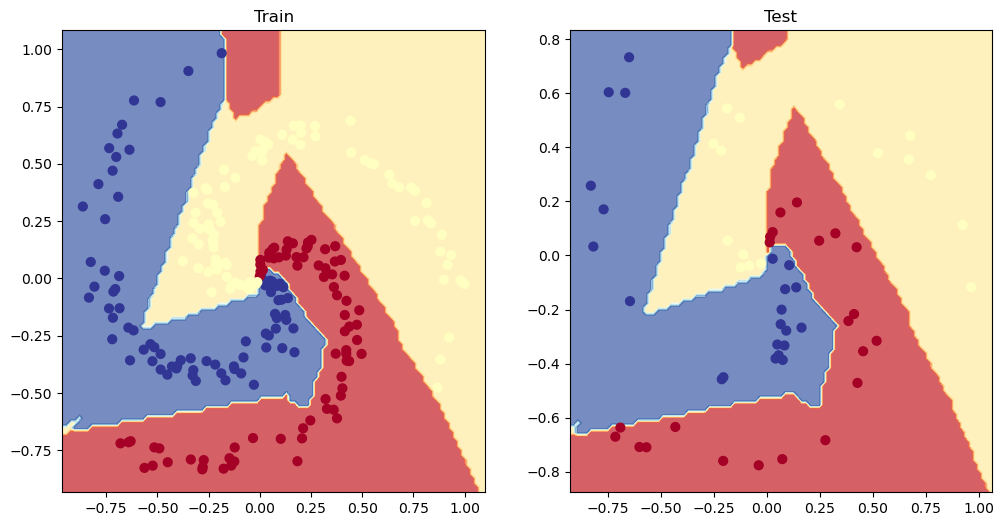

In [32]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)